# Trending YouTube Content Analysis

## Introduction
The purpose of this analysis is to analyze the stats of YouTube trending videos to derive insights into what it takes for a video to trend. The dataset consists of 40,901 records representing a video's stats on a day it was considered trending. There are 6,351 unique videos in this dataset, which spans the trending date range from November 2017 to June 2018. 

## Questions
- What types of videos appear in trending content most often? How has that changed over time?
- Are there particular days/times videos were posted that affect top video performance?
- How long does a video trend typically? Are there any videos that trended for a significant amount of time? Why?
- Is there a threshold for the amount of engagement/other statistic to become trending?
- What creators have had the most success in consistently publishing trending video? Why?
- Are there common themes in best practices (titles, descriptions, tags) amongst trending content?

In [22]:
import numpy as np
import pandas as pd
from tabulate import tabulate

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

# pio.templates.default = "plotly_white"
sns.set()
%matplotlib inline

In [23]:
df = pd.read_pickle('src/individual_videos.pkl')
first = pd.read_pickle('src/full_data_cleaned.pkl')

In [24]:
def ecdf(data):
    """Create params for ECDF plot"""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    
    return x, y

In [25]:
all_ecdf = {}
for category in first.category.unique():
    x, y = ecdf(first[first['category'] == category]['views'])
    all_ecdf[category] = x, y

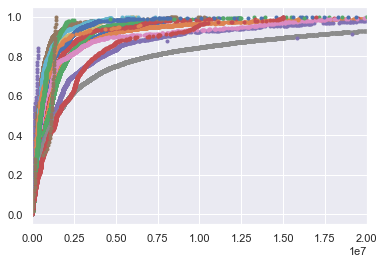

In [26]:
for key in all_ecdf.keys():
    plt.plot(all_ecdf[key][0], all_ecdf[key][1], marker='.', linestyle='none')
    plt.xlim(0, 20000000)
plt.show()

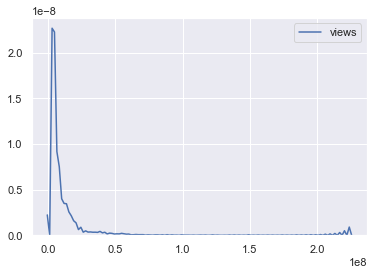

In [27]:
sns.kdeplot(first.views);

#### What types of videos appear in trending content most often? How has that changed over time?
- Over 25% of trending videos fall under the Entertainment category.  
    - <font color='green'>What types of accounts are these? What is the split between brands and individual creators?</font>
- About 13% of trending videos fall under the music category.  
    - <font color='green'>Are these music videos or videos centered around music as a subject? What is the split between the two?</font>
- Howto & Style is the third highest category with ~9% of trending videos.
    - <font color='green'>What accounts/types of videos fall under this category?</font>

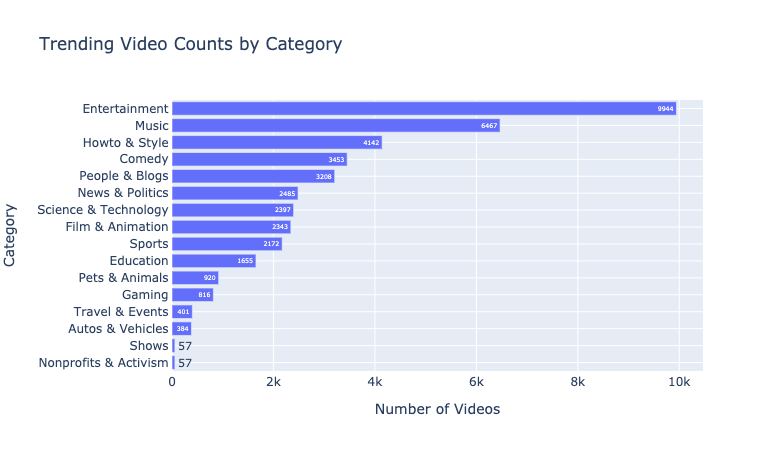

In [28]:
plot_data = first.groupby('category', as_index=False).video_id.count().sort_values(by='video_id')

px.bar(plot_data, x='video_id', y='category', title='Trending Video Counts by Category',
      labels={'video_id': 'Number of Videos', 'category': 'Category'}, text='video_id')

In [29]:
plot_data['perc_videos'] = ((plot_data['video_id'] / plot_data.video_id.sum()) * 100).round(2)
plot_data.sort_values('perc_videos', ascending=False)

category  video_id  perc_videos
3           Entertainment      9944        24.31
7                   Music      6467        15.81
6           Howto & Style      4142        10.13
1                  Comedy      3453         8.44
10         People & Blogs      3208         7.84
8         News & Politics      2485         6.08
12   Science & Technology      2397         5.86
4        Film & Animation      2343         5.73
14                 Sports      2172         5.31
2               Education      1655         4.05
11         Pets & Animals       920         2.25
5                  Gaming       816         2.00
15        Travel & Events       401         0.98
0        Autos & Vehicles       384         0.94
9   Nonprofits & Activism        57         0.14
13                  Shows        57         0.14

## Entertainment channels

In [30]:
# entertainment category videos
ent = first[first['category'] == 'Entertainment']
ent.head()

video_id trending_date  \
1   1ZAPwfrtAFY    2017-11-14   
3   puqaWrEC7tY    2017-11-14   
4   d380meD0W0M    2017-11-14   
6   39idVpFF7NQ    2017-11-14   
11  VifQlJit6A0    2017-11-14   

                                                title          channel_title  \
1   The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
3                    Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                            I Dare You: GOING BALD!?               nigahiga   
6           Roy Moore & Jeff Sessions Cold Open - SNL    Saturday Night Live   
11  (SPOILERS) 'Shiva Saves the Day' Talked About ...                    amc   

    category_id                                               tags    views  \
1            24  [last week tonight trump presidency, last week...  2418783   
3            24  [rhett and link, gmm, good mythical morning, r...   343168   
4            24  [ryan, higa, higatv, nigahiga, i dare you, idy...  2095731   
6            24  [SNL, Saturday Night Live, SNL Season 43, Epis...  2103417   
11           24  [The Walking Dead, shiva, tiger, king ezekiel,...   104578   

     likes  dislikes  comments  \
1    97185      6146     12703   
3    10172       666      2146   
4   132235      1989     17518   
6    15993      2445      1970   
11    1576       303      1279   

                                    thumbnail_link  comments_disabled  \
1   https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg              False   
3   https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg              False   
4   https://i.ytimg.com/vi/d380meD0W0M/default.jpg              False   
6   https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg              False   
11  https://i.ytimg.com/vi/VifQlJit6A0/default.jpg              False   

    ratings_disabled  video_error_or_removed  \
1              False                   False   
3              False                   False   
4              False                   False   
6              False                   False   
11             False                   False   

                                          description publish_date  \
1   One year after the presidential election, John...   2017-11-13   
3   Today we find out if Link is a Nickelback amat...   2017-11-13   
4   I know it's been a while since we did this sho...   2017-11-12   
6   Embattled Alabama Senate candidate Roy Moore (...   2017-11-12   
11  Shiva arrives just in time as King Ezekiel att...   2017-11-13   

   publish_time       category days_to_trend  
1      07:30:00  Entertainment        1 days  
3      11:00:04  Entertainment        1 days  
4      18:01:41  Entertainment        2 days  
6      05:37:17  Entertainment        2 days  
11     03:00:00  Entertainment        1 days

In [31]:
ent.channel_title.nunique()

478

- There are 475 unique channels that had trending videos in the entertainment category.

In [32]:
ent_shows = pd.DataFrame(ent.channel_title.value_counts()).reset_index()
ent_shows[ent_shows['channel_title']>1][:20]

index  channel_title
0                                Netflix            193
1                           TheEllenShow            192
2                    Saturday Night Live            174
3     The Late Show with Stephen Colbert            161
4                        HellthyJunkFood            152
5                  Warner Bros. Pictures            150
6                                    FBE            148
7                  Good Mythical Morning            147
8                            Vanity Fair            144
9   The Late Late Show with James Corden            137
10                             The Voice            121
11                         James Charles            118
12                     Jimmy Kimmel Live            117
13                  Marvel Entertainment            117
14                   Binging with Babish            112
15                      E! Entertainment            108
16                               Complex            108
17                             Star Wars            106
18                    Universal Pictures            106
19                                 WIRED            102

Observing the top 20 channels by number of trending videos:
- 6 of the top 20 videos are talk shows
- 5 of the top 20 are movie/television studios
- 4 of the top 20 are media brands
- 2 of the top 20 are television shows/properties
- 2 of the top 20 are focused around film/television reviews

In [33]:
print(tabulate(ent_shows[ent_shows['channel_title']>1][:20], headers=['index', 'channel_name', 'num_videos'], tablefmt='github'))

|   index | channel_name                         |   num_videos |
|---------|--------------------------------------|--------------|
|       0 | Netflix                              |          193 |
|       1 | TheEllenShow                         |          192 |
|       2 | Saturday Night Live                  |          174 |
|       3 | The Late Show with Stephen Colbert   |          161 |
|       4 | HellthyJunkFood                      |          152 |
|       5 | Warner Bros. Pictures                |          150 |
|       6 | FBE                                  |          148 |
|       7 | Good Mythical Morning                |          147 |
|       8 | Vanity Fair                          |          144 |
|       9 | The Late Late Show with James Corden |          137 |
|      10 | The Voice                            |          121 |
|      11 | James Charles                        |          118 |
|      12 | Jimmy Kimmel Live                    |          117 |
|      13 

In [34]:
from wordcloud import WordCloud

# flatten arrays of tags into one array for all of entertainment category videos
tags = [tag for sublist in ent['tags'] for tag in sublist]

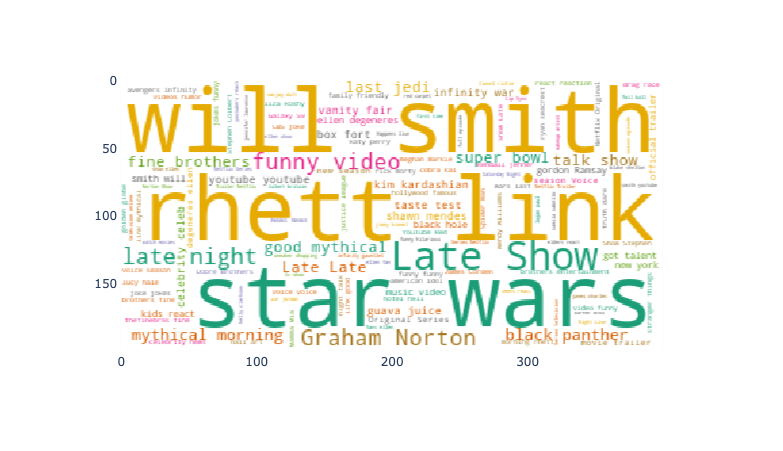

In [35]:
# generate wordcloud from all tags
wc = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=42)

tag_string = ' '.join(tags)
cloud = wc.generate(tag_string)

px.imshow(cloud)

The late night talk show/interview format is popular amongst trending entertainment content.

Entertainment EDA observations/questions:
- John Campea has 15 trending videos as an individual creator. What videos were these? What dates did they trend? Were they in succession? Could the potentially have been linked together? 
    - He also publishes a high volume of live content. Were these videos live streams?  

<font color='orange'>John campea, trending dates, time published, live or VOD</font>

- The Ellen Show is the top channel in terms of trending content, but clearly Late Night shows, and celebrity interview content in general, are all high performers. What time of day were these videos posted? Were the Ellen Show clips posted the same time as her show airs? Is there a link to the audience's viewing of linear to viewing VOD?   

<font color='orange'>Compare Ellen to late night, time published</font>

In [36]:
john = ent[ent['channel_title'] == 'John Campea']
other = ent[ent['channel_title'] != 'John Campea']

In [37]:
john.shape, other.shape

((55, 19), (9889, 19))

In [38]:
john.head()

video_id trending_date  \
73   abGCYPCk294    2017-11-14   
355  abGCYPCk294    2017-11-15   
591  abGCYPCk294    2017-11-16   
640  Y2-JjnW3w2g    2017-11-17   
867  Y2-JjnW3w2g    2017-11-18   

                                                 title channel_title  \
73   Justice League Reactions, Should Disney Buy Ne...   John Campea   
355  Justice League Reactions, Should Disney Buy Ne...   John Campea   
591  Justice League Reactions, Should Disney Buy Ne...   John Campea   
640  Who Matt Reeves Wants As Batman, Is Basmati Bl...   John Campea   
867  Who Matt Reeves Wants As Batman, Is Basmati Bl...   John Campea   

     category_id                                               tags  views  \
73            24  [Justice LEague, Movie, Reactions, Reviews, Fi...  43715   
355           24  [Justice LEague, Movie, Reactions, Reviews, Fi...  44939   
591           24  [Justice LEague, Movie, Reactions, Reviews, Fi...  45236   
640           24  [Batman, Matt Reeves, Ben Affleck, Marvel, DC,...  39504   
867           24  [Batman, Matt Reeves, Ben Affleck, Marvel, DC,...  50899   

     likes  dislikes  comments  \
73    1550       109      1031   
355   1576       110      1021   
591   1581       110       911   
640   1389        92       696   
867   1520       120       864   

                                     thumbnail_link  comments_disabled  \
73   https://i.ytimg.com/vi/abGCYPCk294/default.jpg              False   
355  https://i.ytimg.com/vi/abGCYPCk294/default.jpg              False   
591  https://i.ytimg.com/vi/abGCYPCk294/default.jpg              False   
640  https://i.ytimg.com/vi/Y2-JjnW3w2g/default.jpg              False   
867  https://i.ytimg.com/vi/Y2-JjnW3w2g/default.jpg              False   

     ratings_disabled  video_error_or_removed  \
73              False                   False   
355             False                   False   
591             False                   False   
640             False                   False   
867             False                   False   

                                           description publish_date  \
73   On this episode of The John Campea Show (Recor...   2017-11-11   
355  On this episode of The John Campea Show (Recor...   2017-11-11   
591  On this episode of The John Campea Show (Recor...   2017-11-11   
640  On this episode of The John Campea Show (Recor...   2017-11-16   
867  On this episode of The John Campea Show (Recor...   2017-11-16   

    publish_time       category days_to_trend  
73      17:55:27  Entertainment        3 days  
355     17:55:27  Entertainment        4 days  
591     17:55:27  Entertainment        5 days  
640     16:47:12  Entertainment        1 days  
867     16:47:12  Entertainment        2 days

In [39]:
john.dtypes

video_id                           object
trending_date              datetime64[ns]
title                              object
channel_title                      object
category_id                         int64
tags                               object
views                               int64
likes                               int64
dislikes                            int64
comments                            int64
thumbnail_link                     object
comments_disabled                    bool
ratings_disabled                     bool
video_error_or_removed               bool
description                        object
publish_date               datetime64[ns]
publish_time                       object
category                           object
days_to_trend             timedelta64[ns]
dtype: object

In [40]:
john.days_to_trend.dt.days.describe()

count    55.000000
mean      3.963636
std       1.865512
min       1.000000
25%       2.000000
50%       4.000000
75%       5.000000
max       8.000000
Name: days_to_trend, dtype: float64

In [41]:
other.days_to_trend.dt.days.describe()

count    9889.000000
mean       13.079988
std       104.034832
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max      4215.000000
Name: days_to_trend, dtype: float64

In [42]:
other_lim = other[other['days_to_trend'].dt.days < 40]
pd.cut(other_lim['days_to_trend'].dt.days, bins=20).value_counts() / pd.cut(other_lim['days_to_trend'].dt.days, bins=20).value_counts().sum()

(3.6, 5.4]       0.228042
(1.8, 3.6]       0.222947
(5.4, 7.2]       0.177298
(7.2, 9.0]       0.093744
(-0.036, 1.8]    0.078154
(10.8, 12.6]     0.052578
(12.6, 14.4]     0.039943
(9.0, 10.8]      0.031791
(14.4, 16.2]     0.026900
(16.2, 18.0]     0.017118
(19.8, 21.6]     0.008559
(21.6, 23.4]     0.006725
(18.0, 19.8]     0.005706
(23.4, 25.2]     0.004789
(25.2, 27.0]     0.003363
(27.0, 28.8]     0.001223
(28.8, 30.6]     0.000815
(34.2, 36.0]     0.000204
(30.6, 32.4]     0.000102
(32.4, 34.2]     0.000000
Name: days_to_trend, dtype: float64

John's videos appeared in trending about 2 days after the video went live on average. 
46% of all other trending videos became trending the day of, or the day after they were published. Another 40% of videos became trending 2-3 days after publishing, so John's videos aren't out of the ordinary by any means in terms of time to trend.

In [43]:
john.describe()

category_id          views        likes    dislikes     comments  \
count         55.0      55.000000    55.000000   55.000000    55.000000   
mean          24.0   51278.418182  1679.927273  176.872727  1009.818182   
std            0.0   20786.560956   627.602931  135.772693   699.987145   
min           24.0   28616.000000  1024.000000   37.000000   465.000000   
25%           24.0   36401.500000  1299.000000   70.000000   584.500000   
50%           24.0   43715.000000  1419.000000  110.000000   767.000000   
75%           24.0   62891.000000  1986.500000  323.500000  1059.500000   
max           24.0  108845.000000  3257.000000  477.000000  3530.000000   

                days_to_trend  
count                      55  
mean   3 days 23:07:38.181818  
std    1 days 20:46:20.228880  
min           1 days 00:00:00  
25%           2 days 00:00:00  
50%           4 days 00:00:00  
75%           5 days 00:00:00  
max           8 days 00:00:00

In [44]:
other.describe()

category_id         views         likes      dislikes      comments  \
count       9889.0  9.889000e+03  9.889000e+03  9.889000e+03  9.889000e+03   
mean          24.0  2.078904e+06  5.350802e+04  4.337635e+03  7.421664e+03   
std            0.0  5.835420e+06  1.572697e+05  5.252189e+04  4.206875e+04   
min           24.0  7.980000e+02  0.000000e+00  0.000000e+00  0.000000e+00   
25%           24.0  2.782730e+05  5.219000e+03  2.270000e+02  5.830000e+02   
50%           24.0  7.381990e+05  1.634700e+04  6.310000e+02  1.701000e+03   
75%           24.0  1.741140e+06  4.165800e+04  1.828000e+03  4.632000e+03   
max           24.0  1.493761e+08  3.093544e+06  1.674420e+06  1.361580e+06   

                  days_to_trend  
count                      9889  
mean    13 days 01:55:10.951562  
std    104 days 00:50:09.510797  
min             0 days 00:00:00  
25%             3 days 00:00:00  
50%             5 days 00:00:00  
75%             8 days 00:00:00  
max          4215 days 00:00:00

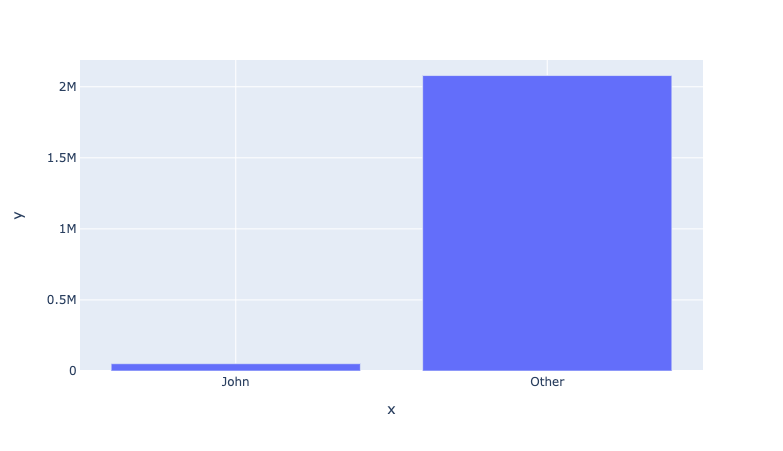

In [45]:
y = [john.views.mean(), other.views.mean()]
x = ['John', 'Other']

px.bar(zip(x, y), x=x, y=y)

In [46]:
john_views = john['views']
other_views = other['views']

In [47]:
views_df = pd.DataFrame(pd.concat([john_views, other_views], axis=0, ignore_index=False)).reset_index(drop=True)
views_df['channel'] = len(john_views)*('John',) + len(other_views)*('Other',)
views_df

views channel
0       43715    John
1       44939    John
2       45236    John
3       39504    John
4       50899    John
...       ...     ...
9939  2003345   Other
9940  1437051   Other
9941  8607264   Other
9942  5564576   Other
9943  1066451   Other

[9944 rows x 2 columns]

## Music channels

In [48]:
# entertainment category videos
music = first[first['category'] == 'Music']
music.head()

video_id trending_date  \
12  5E4ZBSInqUU    2017-11-14   
32  n1WpP7iowLc    2017-11-14   
37  e_7zHm7GsYc    2017-11-14   
39  zZ9FciUx6gs    2017-11-14   
40  PaJCFHXcWmM    2017-11-14   

                                                title channel_title  \
12         Marshmello - Blocks (Official Music Video)    marshmello   
32         Eminem - Walk On Water (Audio) ft. Beyoncé    EminemVEVO   
37  Hunter Hayes - You Should Be Loved (Part One O...  Hunter Hayes   
39  Nickelback - The Betrayal Act III [Official Vi...    Nickelback   
40                                  U2 - The Blackout        U2VEVO   

    category_id                                               tags     views  \
12           10  [marshmello, blocks, marshmello blocks, blocks...    687582   
32           10  [Eminem, Walk, On, Water, Aftermath/Shady/Inte...  17158531   
37           10  [Hunter, Hayes, you should be loved, the shado...     13917   
39           10  [Nickelback, Feed The Machine, The Betrayal Ac...     57169   
40           10         [U2, The, Blackout, Island, Records, Rock]     60506   

     likes  dislikes  comments  \
12  114188      1333      8371   
32  787419     43420    125882   
37    1318        24        76   
39    6927       161       565   
40    5389       106       455   

                                    thumbnail_link  comments_disabled  \
12  https://i.ytimg.com/vi/5E4ZBSInqUU/default.jpg              False   
32  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg              False   
37  https://i.ytimg.com/vi/e_7zHm7GsYc/default.jpg              False   
39  https://i.ytimg.com/vi/zZ9FciUx6gs/default.jpg              False   
40  https://i.ytimg.com/vi/PaJCFHXcWmM/default.jpg              False   

    ratings_disabled  video_error_or_removed  \
12             False                   False   
32             False                   False   
37             False                   False   
39             False                   False   
40             False                   False   

                                          description publish_date  \
12  WATCH SILENCE MUSIC VIDEO ▶ https://youtu.be/T...   2017-11-13   
32  Eminem's new track Walk on Water ft. Beyoncé i...   2017-11-10   
37  You Should Be Loved (feat. The Shadowboxers) A...   2017-11-13   
39  New Album, ‘Feed The Machine’, Available Now: ...   2017-11-13   
40  'The Blackout’ from upcoming album Songs of Ex...   2017-11-13   

   publish_time category days_to_trend  
12     17:00:00    Music        1 days  
32     17:00:03    Music        4 days  
37     15:01:18    Music        1 days  
39     15:31:44    Music        1 days  
40     17:00:04    Music        1 days

In [49]:
music.channel_title.nunique()

443

- 438 unique YT channels

In [50]:
music_shows = pd.DataFrame(music.channel_title.value_counts()).reset_index()
top_music = music_shows[music_shows['channel_title']>1][:20]
top_music

index  channel_title
0         PTXofficial             90
1        Charlie Puth             83
2             ibighit             80
3              SMTOWN             72
4           Billboard             64
5    jypentertainment             64
6    Atlantic Records             60
7   MeghanTrainorVEVO             59
8      CalumScottVEVO             58
9             SiaVEVO             58
10    ShawnMendesVEVO             58
11     TroyeSivanVEVO             57
12        BBC Radio 1             56
13     Kelly Clarkson             55
14              Diplo             54
15   ChainsmokersVEVO             54
16    TaylorSwiftVEVO             49
17      CAguileraVEVO             49
18        Alan Walker             48
19         Ed Sheeran             47

In [51]:
print(tabulate(top_music, headers=['index', 'channel_name', 'num_videos'], tablefmt='github'))


|   index | channel_name      |   num_videos |
|---------|-------------------|--------------|
|       0 | PTXofficial       |           90 |
|       1 | Charlie Puth      |           83 |
|       2 | ibighit           |           80 |
|       3 | SMTOWN            |           72 |
|       4 | Billboard         |           64 |
|       5 | jypentertainment  |           64 |
|       6 | Atlantic Records  |           60 |
|       7 | MeghanTrainorVEVO |           59 |
|       8 | CalumScottVEVO    |           58 |
|       9 | SiaVEVO           |           58 |
|      10 | ShawnMendesVEVO   |           58 |
|      11 | TroyeSivanVEVO    |           57 |
|      12 | BBC Radio 1       |           56 |
|      13 | Kelly Clarkson    |           55 |
|      14 | Diplo             |           54 |
|      15 | ChainsmokersVEVO  |           54 |
|      16 | TaylorSwiftVEVO   |           49 |
|      17 | CAguileraVEVO     |           49 |
|      18 | Alan Walker       |           48 |
|      19 | E

- Top spot is BBC Radio 1

    *Are these mixes? They post mixes and live performances mainly. If they are predominantly mixes that are trending, that'd be interesting.*

- 8 individual artists/music groups

    *Interesting that each artist had multiple videos trend during this time. What dates did they trend? Maybe it was a matter of the link between the videos being really strong and they trended at the same time. Were the songs from the same album/release?*

- 6 korean music labels/music channels

    *MVs. Strong KPop culture in media consumption in the US.*

- Atlantic Records has the MV trend for their artists through their brand, unlike some other artists here that see their content trend through their own channel. That's interesting. What does Atlantic do differently from other labels? What is the size of their artists? Do their artists release content on their own channels as well? How do those perform?

    *Compare Atlantic to other record labels, and compare Atlantic artists to other artists.*